### Daniela Jiménez Téllez

### A01654798

--- 

# **Momento de Retroalimentación:** Módulo 2. Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

---

*En esta entrega se resolverá el Week02_Challenge 1.*

![Captura de pantalla 2024-08-22 100031.png](<attachment:Captura de pantalla 2024-08-22 100031.png>)
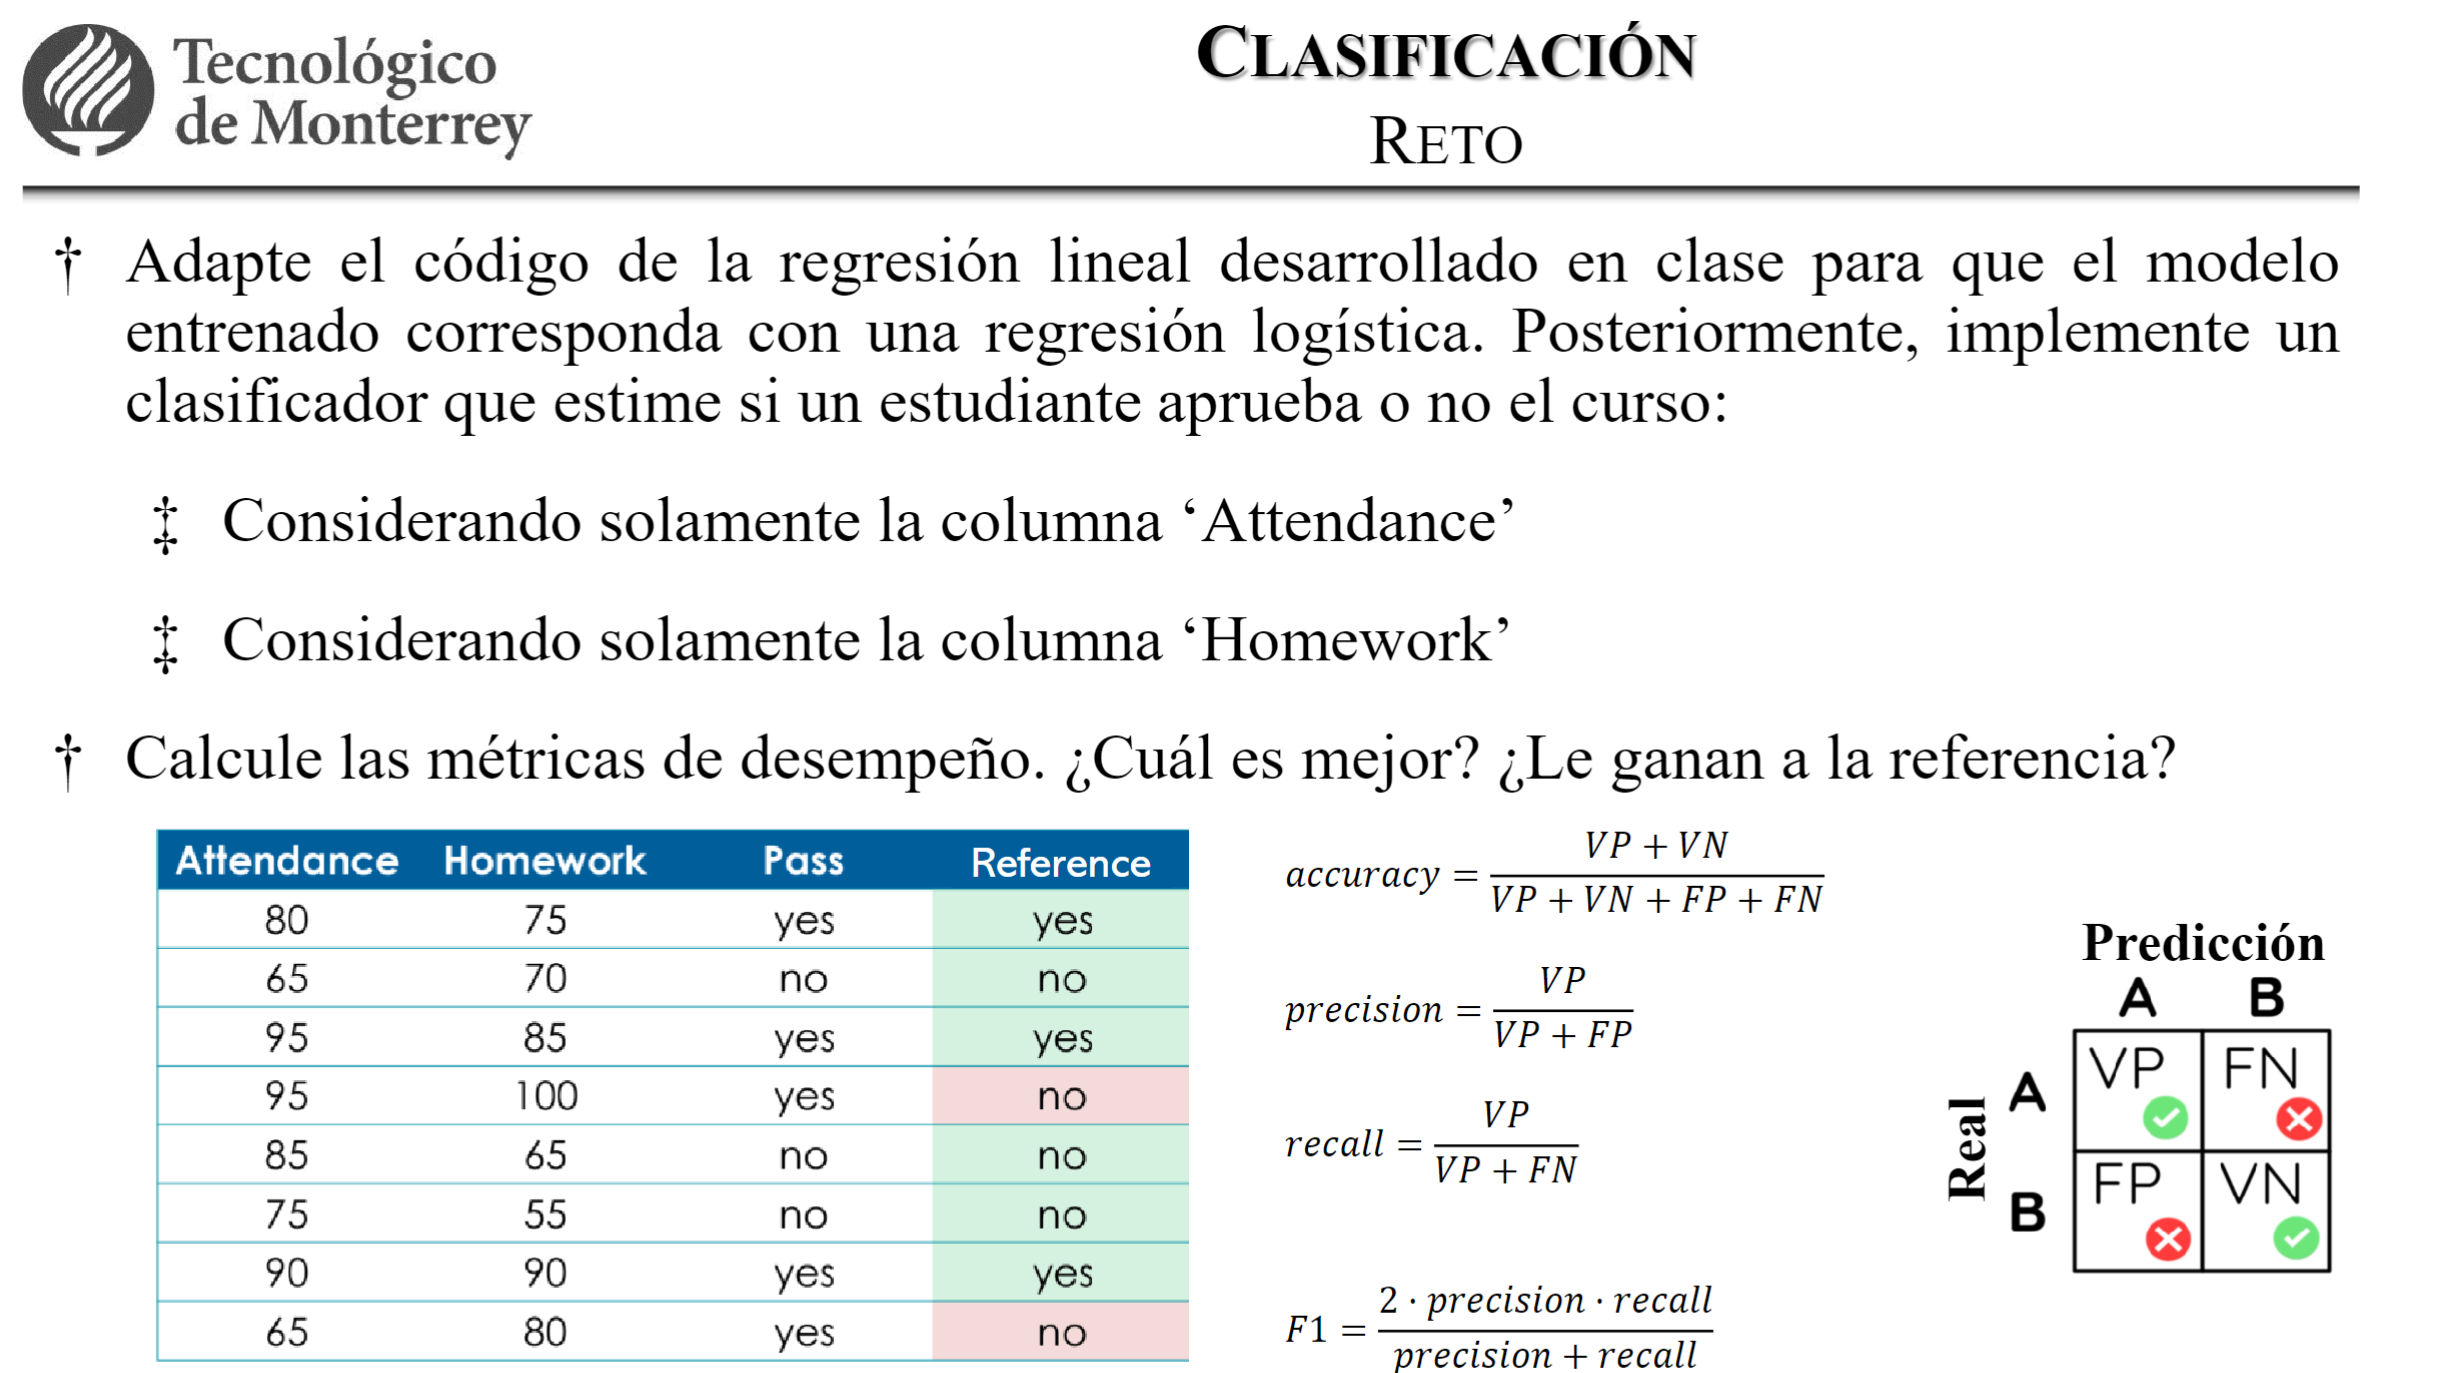

## Importación de librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importación de datos

In [3]:
data = {
    "Attendance": [80, 65, 95, 95, 85, 75, 90, 65],
    "Homework": [75, 70, 85, 100, 65, 55, 90, 80],
    "Pass": ["yes", "no", "yes", "yes", "no", "no", "yes", "yes"]}

df = pd.DataFrame(data)
df["Pass"] = df["Pass"].apply(lambda x: 1 if x == "yes" else 0)

In [4]:
df

,Attendance,Homework,Pass
0,80,75,1
1,65,70,0
2,95,85,1
3,95,100,1
4,85,65,0
5,75,55,0
6,90,90,1
7,65,80,1


### 1. Programa un algoritmo que permita resolver el problema. Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice), y no puedes usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada.

Para poder programar el modelo se utilizarán las siguientes fórmulas vistas en clase:

* **Función de Hipótesis:**

$$ h_\theta(x) = \frac{1}{1 + e^{-x \cdot \theta}} $$

* **Cálculo de $\theta$'s:**

$$ \theta_0 = \theta_0 - \alpha \frac{1}{n} \sum_{i=1}^{n} \left( h_{\theta}(x_i) - y_i \right) $$

$$ \theta_k = \theta_k - \alpha \frac{1}{n} \sum_{i=1}^{n} \left( h_{\theta}(x_{i,k}) - y_i \right) x_{i,k} \quad \forall k \in \{1,2,\dots\} $$

* **Función de costo:**

$$ J_{\theta} = J(\theta_0, \theta_1) = -\frac{1}{n} \sum_{i=1}^{n} \left( \textcolor{red}{y_i \ln(h_{\theta}(x_i))} + \textcolor{green}{(1 - y_i) \ln(1 - h_{\theta}(x_i))} \right) $$

In [8]:
# Función de hipótesis

def funcionHipotesis(x, theta_0, theta_1):
    return 1 / (1 + np.exp( - (theta_0 + theta_1 * x)))

# Función para actualizar theta's

def theta0Nueva(theta_0, alpha, h, y):
    return theta_0 - alpha * np.sum(h - y) / len(y)


def theta1Nueva(theta_1, alpha, h, y, x):
    return theta_1 - alpha * np.sum((h - y) * x) / len(y)

# Función para calcular el costo

def funcionCosto(h, y):
    return - np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))


# Función para entrenar el modelo

def entrenarModelo(x, y, alpha, iteraciones):

    theta_0 = 0
    theta_1 = 0

    for i in range(iteraciones):

        h = funcionHipotesis(x, theta_0, theta_1)
        theta_0 = theta0Nueva(theta_0, alpha, h, y)
        theta_1 = theta1Nueva(theta_1, alpha, h, y, x)

    return theta_0, theta_1

# Función para predecir resultados

def predecirResultados(x, theta_0, theta_1):
    return funcionHipotesis(x, theta_0, theta_1) >= 0.5

# Función para calcular métricas de desempeño

def calcularMetricas(y_true, y_pred):

    VP = np.sum((y_true == 1) & (y_pred == 1))
    VN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (VP + VN) / (VP + VN + FP + FN)
    precision = VP / (VP + FP)
    recall = VP / (VP + FN)
    f1 = 2 * (recall * precision) / (recall + precision)
    
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1}

# Función para dividir el dataset

def dividirDataSet(X, y, test_size = 0.3):

    np.random.seed(302)

    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

### 2. Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba. Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones. Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.

In [6]:
# Dividiendo las variables independientes entre Attendance y Homework

X_attendance = df["Attendance"].values
X_homework = df["Homework"].values
y = df["Pass"].values

# Dividiendo entre entrenamiento y prueba

## Attendance 
X_train_attendance, X_test_attendance, y_train, y_test = dividirDataSet(X_attendance, y)

## Homework
X_train_homework, X_test_homework, y_train, y_test = dividirDataSet(X_homework, y)

### 3. Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica. 

In [9]:
# Evaluación del modelo

## Attendance

theta_0_attendance, theta_1_attendance = entrenarModelo(X_train_attendance, y_train, alpha = 0.01, iteraciones = 100)
predictions_attendance = predecirResultados(X_test_attendance, theta_0_attendance, theta_1_attendance)

## Homework

theta_0_homework, theta_1_homework = entrenarModelo(X_train_homework, y_train, alpha = 0.01, iteraciones = 100)
predictions_homework = predecirResultados(X_test_homework, theta_0_homework, theta_1_homework)

# Métricas de desempeño

## Attendance 

metrics_attendance = calcularMetricas(y_test, predictions_attendance)
print("\nMétricas de desempeño para Attendance:")
for metric, value in metrics_attendance.items():
    print(f"{metric}: {value}")

## Homework

metrics_homework = calcularMetricas(y_test, predictions_homework)
print("\nMétricas de desempeño para el modelo Homework:")
for metric, value in metrics_homework.items():
    print(f"{metric}: {value}")


Métricas de desempeño para Attendance:
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Métricas de desempeño para el modelo Homework:
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


### 4. Calcula el valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba. 

In [10]:
# Attendance

h_attendance_train = funcionHipotesis(X_train_attendance, theta_0_attendance, theta_1_attendance)
cost_attendance_train = funcionCosto(h_attendance_train, y_train)
print(f"Costo para el modelo 'Attendance' (entrenamiento): {cost_attendance_train}")

h_attendance_test = funcionHipotesis(X_test_attendance, theta_0_attendance, theta_1_attendance)
cost_attendance_test = funcionCosto(h_attendance_test, y_test)
print(f"Costo para el modelo 'Attendance' (prueba): {cost_attendance_test}")

# Homework 

h_homework_train = funcionHipotesis(X_train_homework, theta_0_homework, theta_1_homework)
cost_homework_train = funcionCosto(h_homework_train, y_train)
print(f"Costo para el modelo 'Homework' (entrenamiento): {cost_homework_train}")

h_homework_test = funcionHipotesis(X_test_homework, theta_0_homework, theta_1_homework)
cost_homework_test = funcionCosto(h_homework_test, y_test)
print(f"Costo para el modelo 'Homework' (prueba): {cost_homework_test}")

Costo para el modelo 'Attendance' (entrenamiento): 2.976007917320281
Costo para el modelo 'Attendance' (prueba): 4.463828710134916
Costo para el modelo 'Homework' (entrenamiento): nan
Costo para el modelo 'Homework' (prueba): 11.645490361507557


C:\Users\danyj\AppData\Local\Temp\ipykernel_28732\3339589900.py:18: RuntimeWarning: divide by zero encountered in log
  return - np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\danyj\AppData\Local\Temp\ipykernel_28732\3339589900.py:18: RuntimeWarning: invalid value encountered in multiply
  return - np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
